In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Kraus, SuperOp, random_quantum_channel, PTM, Choi, Chi
from qiskit.visualization import plot_histogram
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
)

In [2]:
## random quantum channel in Stinespring form
from qiskit.quantum_info import random_quantum_channel
random_quantum_channel(2, 2)

Stinespring([[-0.05760772+0.00106509j, -0.19350963-0.0401619j ],
             [ 0.24365713-0.09010473j, -0.08502675+0.15826805j],
             [ 0.23490127-0.15828181j,  0.24164486-0.63383471j],
             [-0.49953996-0.40729664j,  0.33613988-0.13725047j],
             [-0.23165985-0.1400763j , -0.241295  +0.13371234j],
             [-0.1796485 +0.50822143j,  0.19129119-0.13145751j],
             [-0.04028069+0.14143228j,  0.25705094+0.259912j  ],
             [-0.12779897+0.17810568j, -0.25469481-0.0906741j ]],
            input_dims=(2,), output_dims=(2,))

In [3]:
rqc = PTM(random_quantum_channel(2, 2))
print('num_qubits: ', rqc.num_qubits)
rqc

num_qubits:  1


PTM([[ 1.00000000e+00-4.01384889e-18j,  0.00000000e+00-1.38777878e-17j,
      -1.38777878e-17+0.00000000e+00j, -1.11022302e-16-5.44312317e-18j],
     [-1.53725014e-01+0.00000000e+00j, -4.46499899e-01+0.00000000e+00j,
      -4.70591410e-01+0.00000000e+00j,  3.05936384e-01+0.00000000e+00j],
     [-1.27485259e-01+0.00000000e+00j,  2.56194680e-01+0.00000000e+00j,
      -7.99948838e-02+0.00000000e+00j,  6.13231363e-01+0.00000000e+00j],
     [ 1.09430915e-01-3.90780595e-18j, -4.06349554e-01+2.77555756e-17j,
       3.85837626e-01+0.00000000e+00j,  3.55899224e-01-6.57271250e-18j]],
    input_dims=(2,), output_dims=(2,))

In [4]:
rqc.compose(rqc)

PTM([[ 1.00000000e+00-6.48998061e-18j,  4.15584477e-17-5.46954628e-18j,
      -5.56042174e-17+4.43060601e-18j, -1.59045349e-16-1.16260467e-17j],
     [ 8.38555556e-03-5.78511045e-19j, -4.55179698e-02+1.06248036e-17j,
       3.65805691e-01+0.00000000e+00j, -3.16299455e-01-1.17408771e-18j],
     [-8.95641523e-02-1.88468260e-18j, -3.84071454e-01+1.87898029e-17j,
       1.22443899e-01+0.00000000e+00j,  2.47572469e-01-3.33667548e-18j],
     [ 1.61654774e-01-1.07238144e-17j,  1.35665091e-01-1.36251410e-18j,
       2.97678886e-01-1.55975353e-17j,  2.38954878e-01+3.21734794e-18j]],
    input_dims=(2,), output_dims=(2,))

In [5]:
rqc.power(4)
rqc.adjoint()
rqc.is_unitary()
rqc.is_cptp() # cp, tp, unitary

True

In [6]:
from qiskit.quantum_info import Kraus
rqc_kraus = Kraus(random_quantum_channel(2, 2))
rqc_kraus

Kraus([[[-0.17941934-0.19947241j,  0.56582495-0.07551515j],
        [ 0.07241651-0.02233852j, -0.01348322+0.16554775j]],

       [[ 0.4246768 +0.17407772j,  0.22289218+0.26345085j],
        [-0.2122798 -0.22752199j, -0.07116099-0.13966675j]],

       [[-0.04528953+0.60580496j,  0.06824045+0.07371949j],
        [ 0.2525324 -0.04565637j,  0.02473258+0.10779692j]],

       [[ 0.09352321-0.39500915j, -0.4359677 +0.1497757j ],
        [ 0.11908917+0.03041284j, -0.20835034-0.47398324j]]],
      input_dims=(2,), output_dims=(2,))

In [7]:
from qiskit.quantum_info import SuperOp
rqc_superop = SuperOp(random_quantum_channel(2, 2))
rqc_superop

SuperOp([[ 0.64214034+9.27527515e-18j,  0.16489422-8.84075857e-02j,
           0.16489422+8.84075857e-02j,  0.51461971+3.86907564e-18j],
         [-0.03290193-2.89094323e-02j, -0.22882478+1.82662407e-01j,
           0.07532535-2.32493105e-01j, -0.21609686+5.06825265e-02j],
         [-0.03290193+2.89094323e-02j,  0.07532535+2.32493105e-01j,
          -0.22882478-1.82662407e-01j, -0.21609686-5.06825265e-02j],
         [ 0.35785966-5.76426351e-18j, -0.16489422+8.84075857e-02j,
          -0.16489422-8.84075857e-02j,  0.48538029-1.77327844e-18j]],
        input_dims=(2,), output_dims=(2,))

In [8]:
from qiskit.quantum_info import Choi

rqc_choi = Choi(random_quantum_channel(2, 2))
rqc_choi

Choi([[ 0.72262348+1.00484506e-18j, -0.17478786-2.34800356e-01j,
        0.00209029-3.71371876e-02j, -0.01886255-3.08231704e-01j],
      [-0.17478786+2.34800356e-01j,  0.27737652-8.22472202e-19j,
        0.11520672+1.31236789e-01j, -0.00209029+3.71371876e-02j],
      [ 0.00209029+3.71371876e-02j,  0.11520672-1.31236789e-01j,
        0.56322081-1.01601546e-17j, -0.21951808+2.04505367e-02j],
      [-0.01886255+3.08231704e-01j, -0.00209029-3.71371876e-02j,
       -0.21951808-2.04505367e-02j,  0.43677919+7.00393374e-19j]],
     input_dims=(2,), output_dims=(2,))

In [9]:
from qiskit.quantum_info import Chi
rqc_chi = Chi(random_quantum_channel(2, 2))
rqc_chi

Chi([[ 0.23488927+0.00000000e+00j, -0.10118734-1.76615153e-01j,
      -0.22077932-1.13171400e-01j, -0.13785354+1.07178903e-01j],
     [-0.10118734+1.76615153e-01j,  0.55362796-6.93889390e-18j,
      -0.09052323+1.37853541e-01j, -0.17748885-2.20779316e-01j],
     [-0.22077932+1.13171400e-01j, -0.09052323-1.37853541e-01j,
       0.80167029-6.93889390e-18j, -0.00108296+1.01187340e-01j],
     [-0.13785354-1.07178903e-01j, -0.17748885+2.20779316e-01j,
      -0.00108296-1.01187340e-01j,  0.40981248+0.00000000e+00j]],
    input_dims=(2,), output_dims=(2,))

In [10]:
from qiskit.quantum_info import average_gate_fidelity
average_gate_fidelity(random_quantum_channel(2, 2))

0.3758783814644344

In [11]:
from qiskit.quantum_info import process_fidelity
process_fidelity(random_quantum_channel(2, 2), random_quantum_channel(2, 2))

0.628338852898806

In [12]:
from qiskit.quantum_info import gate_error
gate_error(random_quantum_channel(2, 2))

0.5242513260008301

In [13]:
from qiskit.quantum_info import diamond_norm, random_quantum_channel
diamond_norm(random_quantum_channel(2, 2)-random_quantum_channel(2, 2))

from qiskit.quantum_info import diamond_norm, random_quantum_channel
from qiskit.quantum_info import Kraus, SuperOp, PTM

# diamond_norm(random_quantum_channel(2, 2)-random_quantum_channel(2, 2))
## single qubit depolarizing channel
from qiskit_aer.noise import (pauli_error)
# error = depolarizing_error(0.05, 1)
# error
p_error = 0.03
ic = pauli_error([('I', 1)])
dep_err = pauli_error([('X', p_error/3), ('Y', p_error/3), ('Z', p_error/3), ('I', 1 - p_error)])
print(dep_err)
dep_ptm = PTM(dep_err)
dep_ptm
print(f'diamond distance: {diamond_norm(dep_ptm - ic)} with noise rate {p_error}')

QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.01, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(1) = 0.01, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(2) = 0.01, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
  P(3) = 0.97, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
diamond distance: 0.06000010519101877 with noise rate 0.03


In [14]:
# Construct a 1-qubit bit-flip and phase-flip errors
p_error = 0.05
bit_flip = pauli_error([('X', p_error), ('I', 1 - p_error)])
phase_flip = pauli_error([('Z', p_error), ('I', 1 - p_error)])
print(bit_flip)
print(phase_flip)

QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.05, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(1) = 0.95, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.05, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
  P(1) = 0.95, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘


In [15]:
# Compose two bit-flip and phase-flip errors
bitphase_flip = bit_flip.compose(phase_flip)
print(bitphase_flip)

QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.0025000000000000005, Circuit = 
   ┌───┐┌───┐
q: ┤ X ├┤ Z ├
   └───┘└───┘
  P(1) = 0.0475, Circuit = 
   ┌───┐┌───┐
q: ┤ X ├┤ I ├
   └───┘└───┘
  P(2) = 0.0475, Circuit = 
   ┌───┐┌───┐
q: ┤ I ├┤ Z ├
   └───┘└───┘
  P(3) = 0.9025, Circuit = 
   ┌───┐┌───┐
q: ┤ I ├┤ I ├
   └───┘└───┘


In [16]:
# Tensor product two bit-flip and phase-flip errors with
# bit-flip on qubit-0, phase-flip on qubit-1
error2 = phase_flip.tensor(bit_flip)
print(error2)

QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.0025000000000000005, Circuit = 
     ┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ Z ├
     └───┘
  P(1) = 0.0475, Circuit = 
     ┌───┐
q_0: ┤ I ├
     ├───┤
q_1: ┤ Z ├
     └───┘
  P(2) = 0.0475, Circuit = 
     ┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ I ├
     └───┘
  P(3) = 0.9025, Circuit = 
     ┌───┐
q_0: ┤ I ├
     ├───┤
q_1: ┤ I ├
     └───┘


In [17]:
# Convert to Kraus operator
bit_flip_kraus = Kraus(bit_flip)
print(bit_flip_kraus)

Kraus([[[ 9.74679434e-01+0.j,  0.00000000e+00+0.j],
        [ 0.00000000e+00+0.j,  9.74679434e-01+0.j]],

       [[ 0.00000000e+00+0.j,  2.23606798e-01+0.j],
        [ 2.23606798e-01+0.j, -4.96506831e-17+0.j]]],
      input_dims=(2,), output_dims=(2,))


In [18]:
# Convert to Superoperator
phase_flip_sop = SuperOp(phase_flip)
print(phase_flip_sop)

SuperOp([[1. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
         [0. +0.j, 0.9+0.j, 0. +0.j, 0. +0.j],
         [0. +0.j, 0. +0.j, 0.9+0.j, 0. +0.j],
         [0. +0.j, 0. +0.j, 0. +0.j, 1. +0.j]],
        input_dims=(2,), output_dims=(2,))


In [19]:
# Convert back to a quantum error
print(QuantumError(bit_flip_kraus))
 
# Check conversion is equivalent to original error
QuantumError(bit_flip_kraus) == bit_flip

QuantumError on 1 qubits. Noise circuits:
  P(0) = 1.0, Circuit = 
   ┌───────┐
q: ┤ kraus ├
   └───────┘


True

In [20]:
# Measurement misassignment probabilities
p0given1 = 0.1
p1given0 = 0.05
 
ReadoutError([[1 - p1given0, p1given0], [p0given1, 1 - p0given1]])

ReadoutError([[0.95 0.05]
 [0.1  0.9 ]])

In [21]:
# System Specification
n_qubits = 4
circ = QuantumCircuit(n_qubits)
 
# Test Circuit
circ.h(0)
for qubit in range(n_qubits - 1):
    circ.cx(qubit, qubit + 1)
circ.measure_all()
print(circ)

        ┌───┐                ░ ┌─┐         
   q_0: ┤ H ├──■─────────────░─┤M├─────────
        └───┘┌─┴─┐           ░ └╥┘┌─┐      
   q_1: ─────┤ X ├──■────────░──╫─┤M├──────
             └───┘┌─┴─┐      ░  ║ └╥┘┌─┐   
   q_2: ──────────┤ X ├──■───░──╫──╫─┤M├───
                  └───┘┌─┴─┐ ░  ║  ║ └╥┘┌─┐
   q_3: ───────────────┤ X ├─░──╫──╫──╫─┤M├
                       └───┘ ░  ║  ║  ║ └╥┘
meas: 4/════════════════════════╩══╩══╩══╩═
                                0  1  2  3 


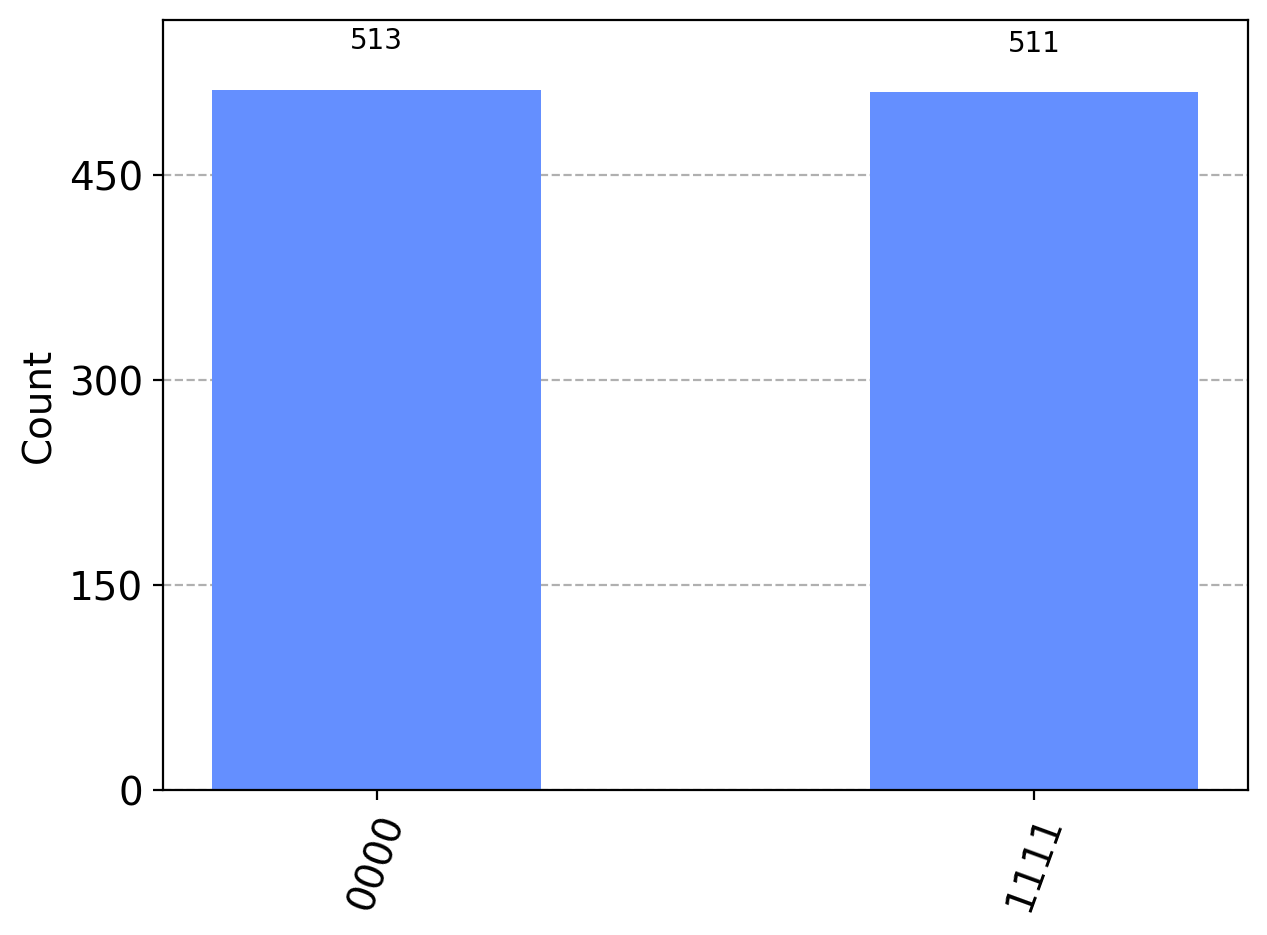

In [22]:
# Ideal simulator and execution
sim_ideal = AerSimulator()
result_ideal = sim_ideal.run(circ).result()
plot_histogram(result_ideal.get_counts(0))

In [23]:
# Example error probabilities
p_reset = 0.03
p_meas = 0.1
p_gate1 = 0.05
 
# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)
 
# Add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])
 
print(noise_bit_flip)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u3', 'u2', 'measure', 'cx', 'reset', 'u1']
  All-qubits errors: ['reset', 'measure', 'u1', 'u2', 'u3', 'cx']


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


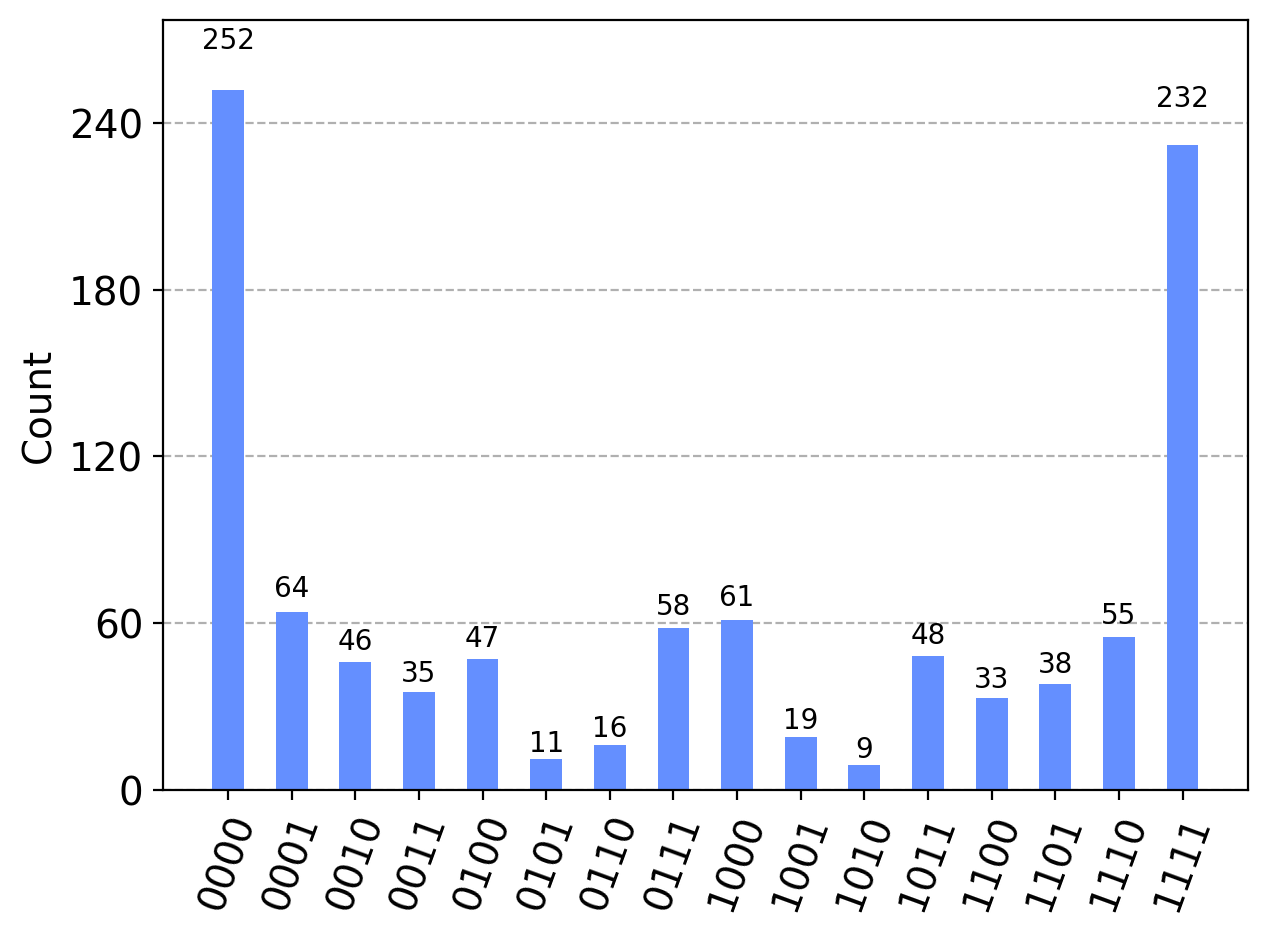

In [24]:
# Create noisy simulator backend
sim_noise = AerSimulator(noise_model=noise_bit_flip)
 
# Transpile circuit for noisy basis gates
passmanager = generate_preset_pass_manager(optimization_level=3, backend=sim_noise)
circ_tnoise = passmanager.run(circ)
 
# Run and get counts
result_bit_flip = sim_noise.run(circ_tnoise).result()
counts_bit_flip = result_bit_flip.get_counts(0)
 
# Plot noisy output
plot_histogram(counts_bit_flip)